In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/SW-AI/

/content/drive/MyDrive/SW-AI


In [ ]:
import numpy as np
import pandas as pd
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train  = pd.read_csv('./competition_data/train.csv', index_col = 0)
test  = pd.read_csv('./competition_data/test.csv', index_col = 0)

In [ ]:
train.head(5)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
index,,,,,,,,,,,,,,,,,,,,,
0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,3.0,...,1.0,20,2.0,12.0,4.0,2.0,1.0,4.0,2.0,1
1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,3.0,...,1.0,49,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1
2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,4.0,...,2.0,43,1.0,2.0,2.0,2.0,3.0,4.0,2.0,1
3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,4.0,...,1.0,17,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1
4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,4.0,...,2.0,18,2.0,12.0,1.0,2.0,1.0,1.0,2.0,0




---



In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set()

In [ ]:
train.isnull().any()

Q1             True
Q2             True
Q3             True
Q4             True
Q5             True
              ...  
voted          True
married        True
familysize     True
ASD            True
nerdiness     False
Length: 69, dtype: bool

In [ ]:
train.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'country', 'introelapse',
       'testelapse', 'surveyelapse', 'TIPI1', 'TIPI2', 'TIPI3', 'TIPI4',
       'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10', 'VCL1', 'VCL2',
       'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10',
       'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16', 'education',
       'urban', 'gender', 'engnat', 'age', 'hand', 'religion', 'orientation',
       'voted', 'married', 'familysize', 'ASD', 'nerdiness'],
      dtype='object')

In [ ]:
# 나라 종류 확인
train['country'].unique()

array(['USA', 'NLD', 'ITA', 'ARE', 'DNK', 'GRC', 'QAT', 'GBR', 'ROU',
       'HUN', 'AUS', 'POL', 'CAN', 'ARG', 'FRA', 'DEU', 'UKR', 'BGR',
       'PAK', 'EST', 'PHL', 'SVN', nan, 'SRB', 'NZL', 'SWE', 'MAR', 'IDN',
       'HKG', 'LUX', 'CHE', 'MYS', 'RUS', 'BRA', 'NOR', 'PRT', 'MEX',
       'IND', 'VNM', 'AUT', 'FIN', 'ESP', 'GUM', 'CHL', 'SGP', 'HND',
       'KOR', 'COL', 'IRL', 'CYP', 'BEL', 'AZE', 'IRQ', 'SVK', 'TUR',
       'NGA', 'ZAF', 'JPN', 'ISR', 'URY', 'ISL', 'GHA', 'CZE', 'KEN',
       'ECU', 'EGY', 'JOR', 'CRI', 'THA', 'PER', 'NPL', 'SAU', 'MKD',
       'DOM', 'PRI', 'TTO', 'CUW', 'BGD', 'LTU', 'HRV', 'IRN', 'GRL',
       'SDN', 'KWT', 'LVA', 'ALB', 'MDV', 'CHN', 'VEN', 'MUS', 'JAM',
       'TWN', 'LBN', 'TUN', 'BIH', 'PNG', 'GUF', 'MDG', 'DZA', 'BRN',
       'ALA', 'VGB', 'SLV', 'OMN', 'PRY', 'LBY', 'GEO', 'BWA', 'FRO',
       'BHR', 'ZMB', 'UGA', 'NAM', 'KAZ', 'VIR', 'MLT', 'ARM', 'BHS',
       'MAC', 'KHM', 'MNP', 'SYR', 'MNG', 'MOZ', 'FJI', 'AFG', 'FSM',
       'AGO', '

In [ ]:
Q_cols = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
          'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20',
          'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26']
TIPI_cols = ['TIPI1', 'TIPI2', 'TIPI3', 'TIPI4',
             'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10']
VCL_cols = ['VCL1', 'VCL2', 'VCL3', 'VCL4', 'VCL5',
            'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10',
            'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16']
elapse_cols = ['introelapse', 'testelapse', 'surveyelapse', 'nerdiness']
other_cols = ['education', 'urban', 'gender', 'engnat', 'age',
              'hand', 'religion', 'orientation', 'voted',
              'married', 'familysize', 'ASD', 'nerdiness']

In [ ]:
# 결측치 확인
train['urban'].isnull().sum()

0

In [ ]:
# other cols 결측치 비율 확인
train[other_cols].isnull().sum() / len(train[other_cols])*100 

education      1.113333
urban          0.000000
gender         0.126667
engnat         0.313333
age            0.000000
hand           0.313333
religion       1.633333
orientation    2.660000
voted          0.566667
married        0.546667
familysize     2.126667
ASD            0.593333
nerdiness      0.000000
dtype: float64

In [ ]:
Q_corr = train[Q_cols].dropna().corr(method='spearman')
TIPI_corr = train[TIPI_cols].fillna(3).corr(method='spearman')
VCL_corr = train[VCL_cols].dropna().corr(method='spearman')
other_corr = train[other_cols].dropna().corr(method='spearman')



---



## 마키아벨리즘

In [ ]:
Q_positive = ['Q1', 'Q2', 'Q5', 'Q8', 'Q12', 'Q13', 'Q15', 'Q19', 'Q20']

Q_negative = ['Q3', 'Q4', 'Q7', 'Q9', 'Q10', 'Q11', 'Q16', 'Q17']

Q_secret = ['Q6', 'Q14', 'Q18', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26']

Q_pp = ['Q1', 'Q2', 'Q5', 'Q6', 'Q8', 'Q12', 'Q13', 'Q15', 'Q19', 'Q20', 'Q21', 'Q24', 'Q25', 'Q26']
Q_nn = ['Q3', 'Q4', 'Q7', 'Q9', 'Q10', 'Q11', 'Q14', 'Q16', 'Q17', 'Q18', 'Q22', 'Q23']

In [ ]:
for col in Q_nn: 
    train[col] = 6 - train[col]

In [ ]:
train['Mach'] = train[Q_cols].mean(axis = 1)

In [ ]:
train['Mach']

index
0        2.884615
1        3.038462
2        3.153846
3        2.961538
4        3.153846
           ...   
14995    3.038462
14996    2.961538
14997    3.153846
14998    2.807692
14999    3.115385
Name: Mach, Length: 15000, dtype: float64

## VCL

In [ ]:
# VCL 결과 합산해 컬럼 추가
train['VCL'] = train[VCL_cols].sum(axis = 1)
train['VCL']

index
0         8
1        11
2        11
3         9
4         8
         ..
14995    11
14996     8
14997     9
14998    12
14999    13
Name: VCL, Length: 15000, dtype: int64

## TIPI

In [ ]:
train[TIPI_cols] = train[TIPI_cols].fillna(3)

In [ ]:
train['T1'] = ( train['TIPI3'] + (8 - train['TIPI8']) ) / 2

In [ ]:
train['T2'] = ( train['TIPI7'] + (8 - train['TIPI2']) ) / 2

In [ ]:
train['T3'] = ( train['TIPI9'] + (8 - train['TIPI4']) ) / 2

In [ ]:
train['T4'] = ( train['TIPI5'] + (8 - train['TIPI10']) ) / 2

In [ ]:
train['T5'] = ( train['TIPI1'] + (8 - train['TIPI6']) ) / 2

In [ ]:
train

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,familysize,ASD,nerdiness,Mach,VCL,T1,T2,T3,T4,T5
index,,,,,,,,,,,,,,,,,,,,,
0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,3.0,...,4.0,2.0,1,3.653846,8,5.0,5.0,6.0,4.0,3.5
1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,3.0,...,4.0,2.0,1,3.115385,11,5.0,5.5,2.5,4.5,5.0
2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,4.0,...,4.0,2.0,1,3.769231,11,3.5,4.5,6.0,5.5,2.0
3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,4.0,...,2.0,2.0,1,3.192308,9,3.5,4.5,3.5,5.0,4.0
4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,4.0,...,1.0,2.0,0,3.538462,8,4.0,4.0,3.5,5.0,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2.0,5.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,...,3.0,2.0,0,3.115385,11,4.5,4.5,4.0,4.0,2.5
14996,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,...,3.0,2.0,1,3.730769,8,5.5,5.0,2.5,5.0,4.0
14997,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,...,3.0,1.0,1,4.230769,9,3.5,4.0,2.0,4.0,2.0


In [ ]:
# corr 히트맵 생성 메소드

def figure_corr(corr):
  low = corr.min().min()
  high = corr.max().max()

  plt.figure(figsize=(13,13))
  sns.heatmap(corr, cmap="coolwarm", square=True, center=0)



---



In [ ]:
def Mach(data):
  Q_cols = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
          'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20',
          'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26']
  Q_pp = ['Q1', 'Q2', 'Q5', 'Q6', 'Q8', 'Q12', 'Q13', 'Q15', 'Q19', 'Q20', 'Q21', 'Q24', 'Q25', 'Q26']
  Q_nn = ['Q3', 'Q4', 'Q7', 'Q9', 'Q10', 'Q11', 'Q14', 'Q16', 'Q17', 'Q18', 'Q22', 'Q23']
  data[Q_cols] = data[Q_cols].fillna(3)
  for col in Q_nn: 
    data[col] = 6 - data[col]
    data['Mach'] = data[Q_cols].mean(axis = 1)

In [ ]:
def TIPI(data):
  TIPI_cols = ['TIPI1', 'TIPI2', 'TIPI3', 'TIPI4',
             'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10']
  data[TIPI_cols] = data[TIPI_cols].fillna(3)
  data['T1'] = ( data['TIPI3'] + (8 - data['TIPI8']) ) / 2
  data['T2'] = ( data['TIPI7'] + (8 - data['TIPI2']) ) / 2
  data['T3'] = ( data['TIPI9'] + (8 - data['TIPI4']) ) / 2
  data['T4'] = ( data['TIPI5'] + (8 - data['TIPI10']) ) / 2
  data['T5'] = ( data['TIPI1'] + (8 - data['TIPI6']) ) / 2

In [ ]:
def VCL(data):
  VCL_cols = ['VCL1', 'VCL2', 'VCL3', 'VCL4', 'VCL5',
            'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10',
            'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16']
  data[VCL_cols] = data[VCL_cols].fillna(0.5)
  # VCL 결과 합산해 컬럼 추가
  data['VCL'] = data[VCL_cols].sum(axis = 1)
  data['VCL']

In [ ]:
def Elapse(data):
  elapse_cols = ['introelapse', 'testelapse', 'surveyelapse']
  for col in elapse_cols:
    median = data[col].median()
    data[f'{col[:-6]}'] = data[col].apply(lambda x: 1 if x > median else 0) # 빠름 0, 느림 1
  train['elapse'] = train['intro'] + train['test'] + train['survey']

In [ ]:
def ASD(data):
  data['ASD'] = data['ASD'].fillna(1)

In [ ]:
def Urban(data):
  data['urban']

In [ ]:
Mach(train)
train

In [ ]:
TIPI(train)

In [ ]:
VCL(train)

In [ ]:
Elapse(train)

In [ ]:
ASD(train)

In [ ]:
train

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,T1,T2,T3,T4,T5,VCL,intro,test,survey,elapse
index,,,,,,,,,,,,,,,,,,,,,
0,1.0,5.0,1.0,1.0,1.0,4.0,1.0,5.0,5.0,3.0,...,5.0,5.0,6.0,4.0,3.5,8,0,1,0,1
1,4.0,4.0,2.0,2.0,4.0,5.0,2.0,4.0,3.0,3.0,...,5.0,5.5,2.5,4.5,5.0,11,0,0,0,0
2,4.0,5.0,1.0,2.0,3.0,5.0,1.0,5.0,2.0,2.0,...,3.5,4.5,6.0,5.5,2.0,11,0,1,0,1
3,4.0,4.0,2.0,4.0,4.0,3.0,3.0,5.0,3.0,2.0,...,3.5,4.5,3.5,5.0,4.0,9,0,1,0,1
4,4.0,4.0,2.0,2.0,3.0,3.0,2.0,2.0,3.0,2.0,...,4.0,4.0,3.5,5.0,3.5,8,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2.0,5.0,2.0,3.0,3.0,4.0,2.0,4.0,3.0,2.0,...,4.5,4.5,4.0,4.0,2.5,11,1,0,0,1
14996,5.0,4.0,1.0,2.0,4.0,5.0,1.0,4.0,2.0,1.0,...,5.5,5.0,2.5,5.0,4.0,8,1,0,1,2
14997,4.0,5.0,1.0,1.0,5.0,5.0,1.0,5.0,2.0,1.0,...,3.5,4.0,2.0,4.0,2.0,9,1,0,1,2


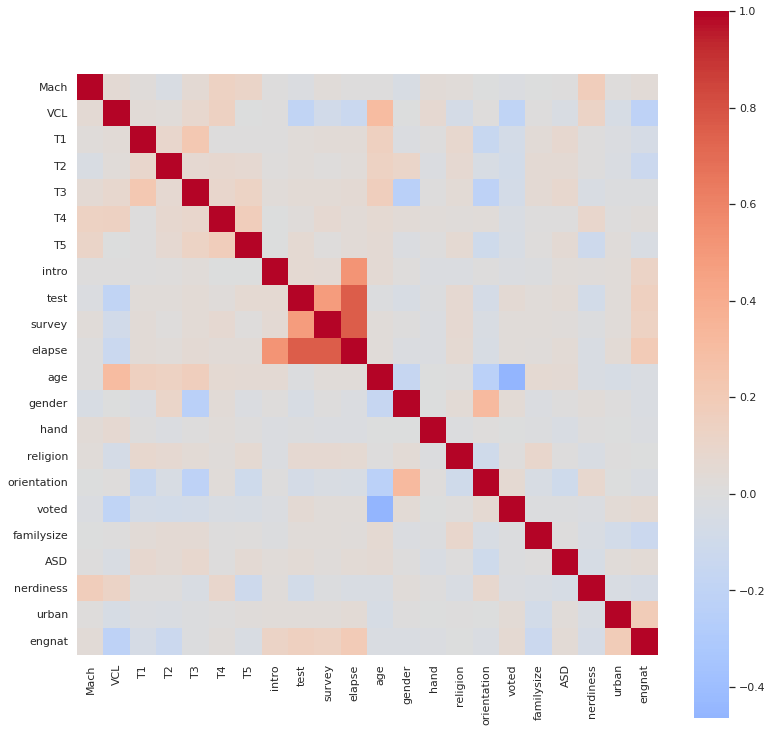

In [209]:
Q_corr = train[['Mach', 'VCL', 'T1', 'T2', 'T3', 'T4', 'T5', 'intro', 'test', 'survey', 'elapse', 'age', 'gender', 'hand', 'religion', 'orientation', 'voted', 'familysize', 'ASD', 'nerdiness', 'urban', 'engnat']].dropna().corr(method='spearman')
figure_corr(Q_corr)

In [212]:
train['engnat'].unique()

array([ 1.,  2., nan])

In [214]:
train['country'].unique()

array(['USA', 'NLD', 'ITA', 'ARE', 'DNK', 'GRC', 'QAT', 'GBR', 'ROU',
       'HUN', 'AUS', 'POL', 'CAN', 'ARG', 'FRA', 'DEU', 'UKR', 'BGR',
       'PAK', 'EST', 'PHL', 'SVN', nan, 'SRB', 'NZL', 'SWE', 'MAR', 'IDN',
       'HKG', 'LUX', 'CHE', 'MYS', 'RUS', 'BRA', 'NOR', 'PRT', 'MEX',
       'IND', 'VNM', 'AUT', 'FIN', 'ESP', 'GUM', 'CHL', 'SGP', 'HND',
       'KOR', 'COL', 'IRL', 'CYP', 'BEL', 'AZE', 'IRQ', 'SVK', 'TUR',
       'NGA', 'ZAF', 'JPN', 'ISR', 'URY', 'ISL', 'GHA', 'CZE', 'KEN',
       'ECU', 'EGY', 'JOR', 'CRI', 'THA', 'PER', 'NPL', 'SAU', 'MKD',
       'DOM', 'PRI', 'TTO', 'CUW', 'BGD', 'LTU', 'HRV', 'IRN', 'GRL',
       'SDN', 'KWT', 'LVA', 'ALB', 'MDV', 'CHN', 'VEN', 'MUS', 'JAM',
       'TWN', 'LBN', 'TUN', 'BIH', 'PNG', 'GUF', 'MDG', 'DZA', 'BRN',
       'ALA', 'VGB', 'SLV', 'OMN', 'PRY', 'LBY', 'GEO', 'BWA', 'FRO',
       'BHR', 'ZMB', 'UGA', 'NAM', 'KAZ', 'VIR', 'MLT', 'ARM', 'BHS',
       'MAC', 'KHM', 'MNP', 'SYR', 'MNG', 'MOZ', 'FJI', 'AFG', 'FSM',
       'AGO', '

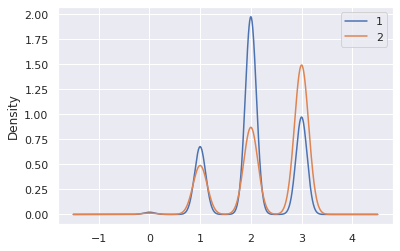

In [213]:
## Age graph with Pclass

train['urban'][train.engnat == 1].plot(kind='kde')
train['urban'][train.engnat == 2].plot(kind='kde')
plt.legend(['1', '2'])
plt.show()

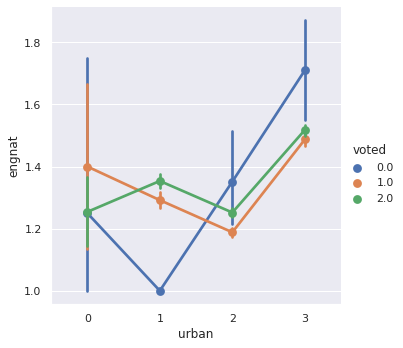

In [211]:
sns.catplot(x='urban', y='engnat', hue='voted', kind='point', data=train)
plt.show()

In [ ]:
train['voted'] = train['voted'].fillna(0)

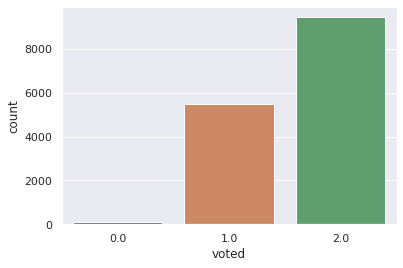

In [ ]:
sns.countplot(x='voted', data=train)
plt.show()

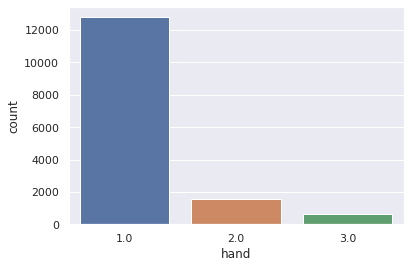

In [ ]:
sns.countplot(x='hand', data=train)
plt.show()

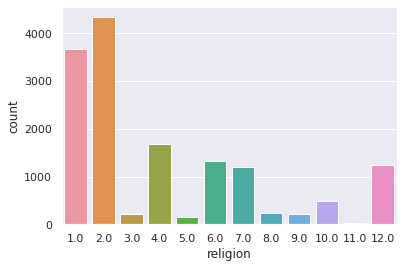

In [ ]:
sns.countplot(x='religion', data=train)
plt.show()

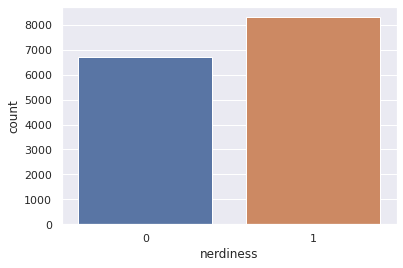

In [ ]:
sns.countplot(x='nerdiness', data=train)
plt.show()

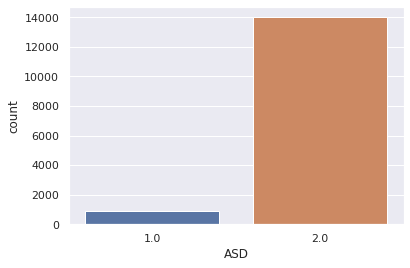

In [ ]:
sns.countplot(x='ASD', data=train)
plt.show()

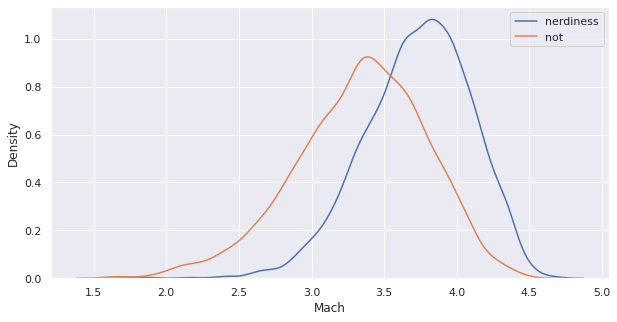

In [ ]:
## nerdiness 1, 0과 Mach의 경향성

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.kdeplot(x=train[train.nerdiness == 1]['Mach'], ax=ax)
sns.kdeplot(x=train[train.nerdiness == 0]['Mach'], ax=ax)

plt.legend(['nerdiness', 'not'])

plt.show()

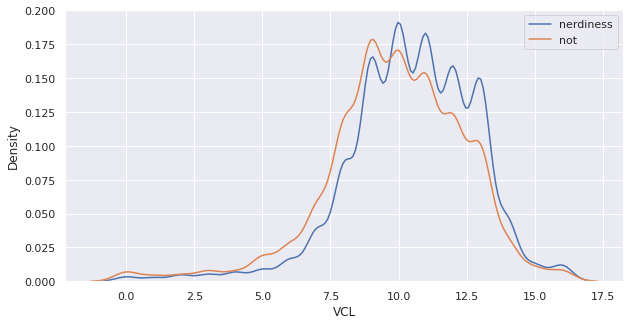

In [ ]:
## nerdiness 1, 0과 VCL의 경향성

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.kdeplot(x=train[train.nerdiness == 1]['VCL'], ax=ax)
sns.kdeplot(x=train[train.nerdiness == 0]['VCL'], ax=ax)

plt.legend(['nerdiness', 'not'])

plt.show()

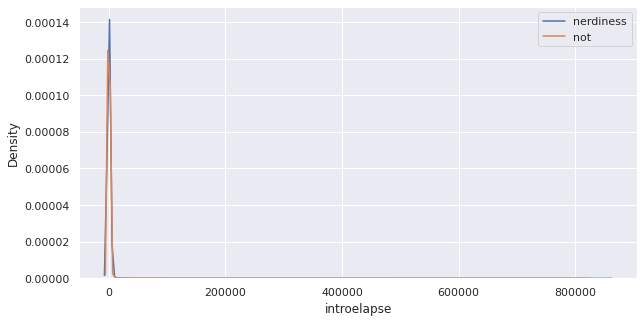

In [ ]:
## nerdiness 1, 0과 VCL의 경향성

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.kdeplot(x=train[train.nerdiness == 1]['introelapse'], ax=ax)
sns.kdeplot(x=train[train.nerdiness == 0]['introelapse'], ax=ax)

plt.legend(['nerdiness', 'not'])

plt.show()

In [ ]:
train['introelapse'].mean()

767.1377333333334

In [ ]:
train[train.introelapse == train['introelapse'].max()]['nerdiness']

index
6318     1
13840    1
Name: nerdiness, dtype: int64

In [ ]:
train[train.testelapse == train['testelapse'].max()]['nerdiness']

index
5196    1
6836    1
Name: nerdiness, dtype: int64

In [ ]:
train[train.surveyelapse == train['surveyelapse'].max()]['nerdiness']

index
1702    1
4367    1
Name: nerdiness, dtype: int64

In [ ]:
'introelapse', 'testelapse', 'surveyelapse', 'nerdiness'

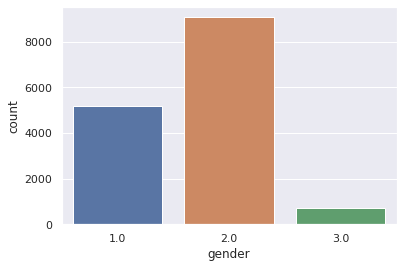

In [ ]:
sns.countplot(x='gender', data=train)
plt.show()

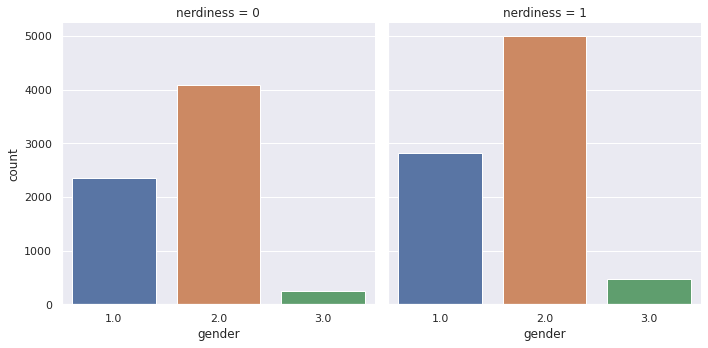

In [ ]:
sns.catplot(x='gender', col='nerdiness', kind='count', data=train)
plt.show()

In [ ]:
train['introelapse'].mean()

767.1377333333334

In [ ]:
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)



---



In [ ]:
train.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'country', 'introelapse',
       'testelapse', 'surveyelapse', 'TIPI1', 'TIPI2', 'TIPI3', 'TIPI4',
       'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10', 'VCL1', 'VCL2',
       'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10',
       'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16', 'education',
       'urban', 'gender', 'engnat', 'age', 'hand', 'religion', 'orientation',
       'voted', 'married', 'familysize', 'ASD', 'nerdiness', 'Mach', 'T1',
       'T2', 'T3', 'T4', 'T5', 'VCL', 'intro', 'test', 'survey', 'elapse'],
      dtype='object')

In [ ]:
train_x = train[['Mach', 'elapse', 'VCL', 'T1', 'T2', 'T3', 'T4', 'T5', 'gender', 'age', 'religion', 'orientation', 'voted', 'education']]
train_y = train['nerdiness']

In [ ]:
#train을 target과 feature로 나눠줍니다.
# train_x=train.drop(['nerdiness'], axis=1)
# train_y=train['nerdiness']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size= 0.2, random_state=1234)

In [ ]:
lgbm_clf = LGBMClassifier(
            n_estimators=2000
        )
lgbm_clf.fit(X_train, y_train)

lgbm_pred = lgbm_clf.predict(X_test)

In [ ]:
import numpy as np
from sklearn import metrics
fpr, tpr, thresholds= metrics.roc_curve(y_test.values, lgbm_pred, pos_label=1)
metrics.auc(fpr, tpr)

0.6856208259262117